# Лабораторная работа №2

ФИО: Шкидин Степан Александрович
Группа: БИВТ-23СП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("=== Загрузка данных ===")

# Попробуем разные варианты
try:
    # Вариант 1: обычное чтение
    data = pd.read_csv('./data/insurance.csv')
    if data.shape[1] == 1:
        raise ValueError("Одна колонка")


# Назначаем колонки
data.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

# Преобразуем в числа
numeric_cols = ['age', 'bmi', 'children', 'charges']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(f"Размер: {data.shape}")
print(data.head())
print("Колонки:", data.columns.tolist())

=== Загрузка данных ===
Размер: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Колонки: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


## 2. Описание постановки задачи

Датасет представляет собой данные индивидуальных медицинских расходов по характеристикам клиента медицинской страховки. В нём 1338 наблюдений и 7 колонок: признаки age, sex, bmi, children, smoker, region и целевая переменная charges

In [ ]:
#Задача: Предсказать медицинские расходы (charges) по характеристикам пациента.
#Тип задачи: Регрессия (целевая переменная — непрерывная).

## 3. Распределение целевой переменной

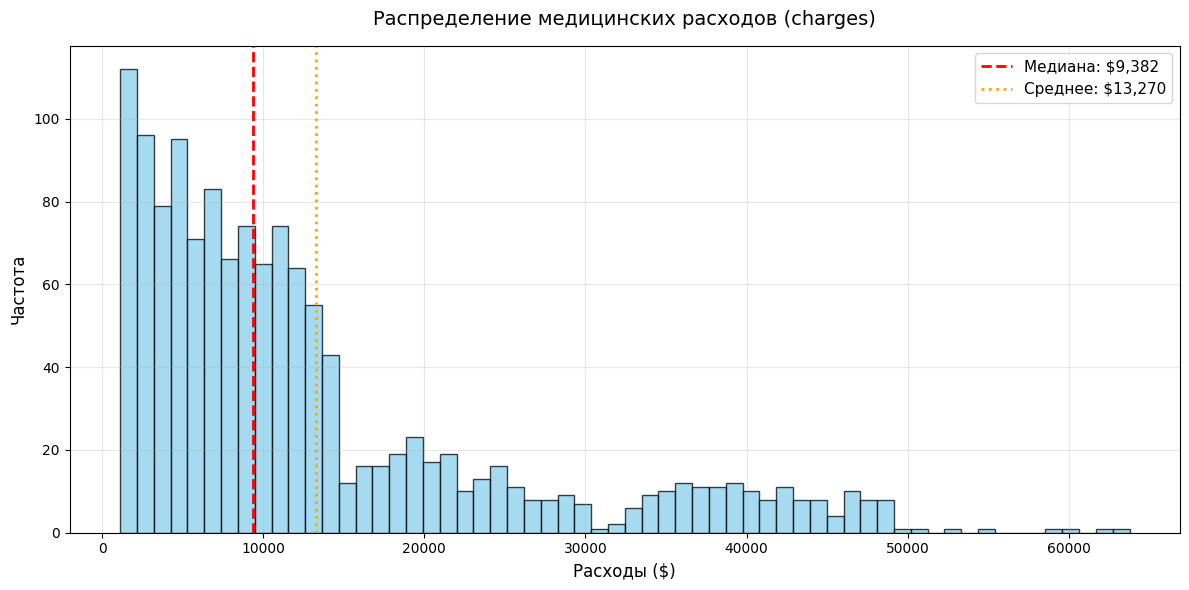

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(data['charges'], bins=60, color='skyblue', edgecolor='black', alpha=0.75)
plt.title('Распределение медицинских расходов (charges)', fontsize=14, pad=15)
plt.xlabel('Расходы ($)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Медиана
median_val = data['charges'].median()
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f'Медиана: ${median_val:,.0f}')
plt.axvline(data['charges'].mean(), color='orange', linestyle=':', linewidth=2, label=f'Среднее: ${data["charges"].mean():,.0f}')

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
# Статистики
unique_count = data['charges'].nunique()
mean_val = data['charges'].mean()
std_val = data['charges'].std()

print(f"Уникальных значений charges: {unique_count}")
print(f"Среднее: ${mean_val:,.2f}")
print(f"Медиана: ${median_val:,.2f}")
print(f"Стандартное отклонение: ${std_val:,.2f}")
print(f"Минимум: ${data['charges'].min():,.2f}")
print(f"Максимум: ${data['charges'].max():,.2f}")

Уникальных значений charges: 1337
Среднее: $13,270.42
Медиана: $9,382.03
Стандартное отклонение: $12,110.01
Минимум: $1,121.87
Максимум: $63,770.43


In [40]:
print("\n=== 4. Основные статистики (describe) ===")
print(data.describe().round(2).T)
print("-" * 50)


=== 4. Основные статистики (describe) ===
           count      mean       std      min      25%      50%       75%  \
age       1338.0     39.21     14.05    18.00    27.00    39.00     51.00   
bmi       1338.0     30.66      6.10    15.96    26.30    30.40     34.69   
children  1338.0      1.09      1.21     0.00     0.00     1.00      2.00   
charges   1338.0  13270.42  12110.01  1121.87  4740.29  9382.03  16639.91   

               max  
age          64.00  
bmi          53.13  
children      5.00  
charges   63770.43  
--------------------------------------------------


In [41]:
print("\n=== 5. Информация о датасете (info) ===")
data.info()
print(f"\nИтого: {data.shape[0]} строк, {data.shape[1]} колонок, {data.isnull().sum().sum()} пропусков")
print("-" * 50)


=== 5. Информация о датасете (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Итого: 1338 строк, 7 колонок, 0 пропусков
--------------------------------------------------


In [43]:
print("\n6. Проверка пропусков")
missing = data.isnull().sum()
if missing.sum() == 0:
    print("Пропущенных значений НЕТ")
else:
    print("Пропуски:")
    print(missing[missing > 0])


print("Пропусков нет - данные чистые")
print("Если бы были:")
print("    - age, bmi, charges - медиана")
print("    - sex, smoker, region - мода")



6. Проверка пропусков
Пропущенных значений НЕТ
Пропусков нет - данные чистые
Если бы были:
    - age, bmi, charges - медиана
    - sex, smoker, region - мода



=== 7. Гистограммы 5 признаков ===


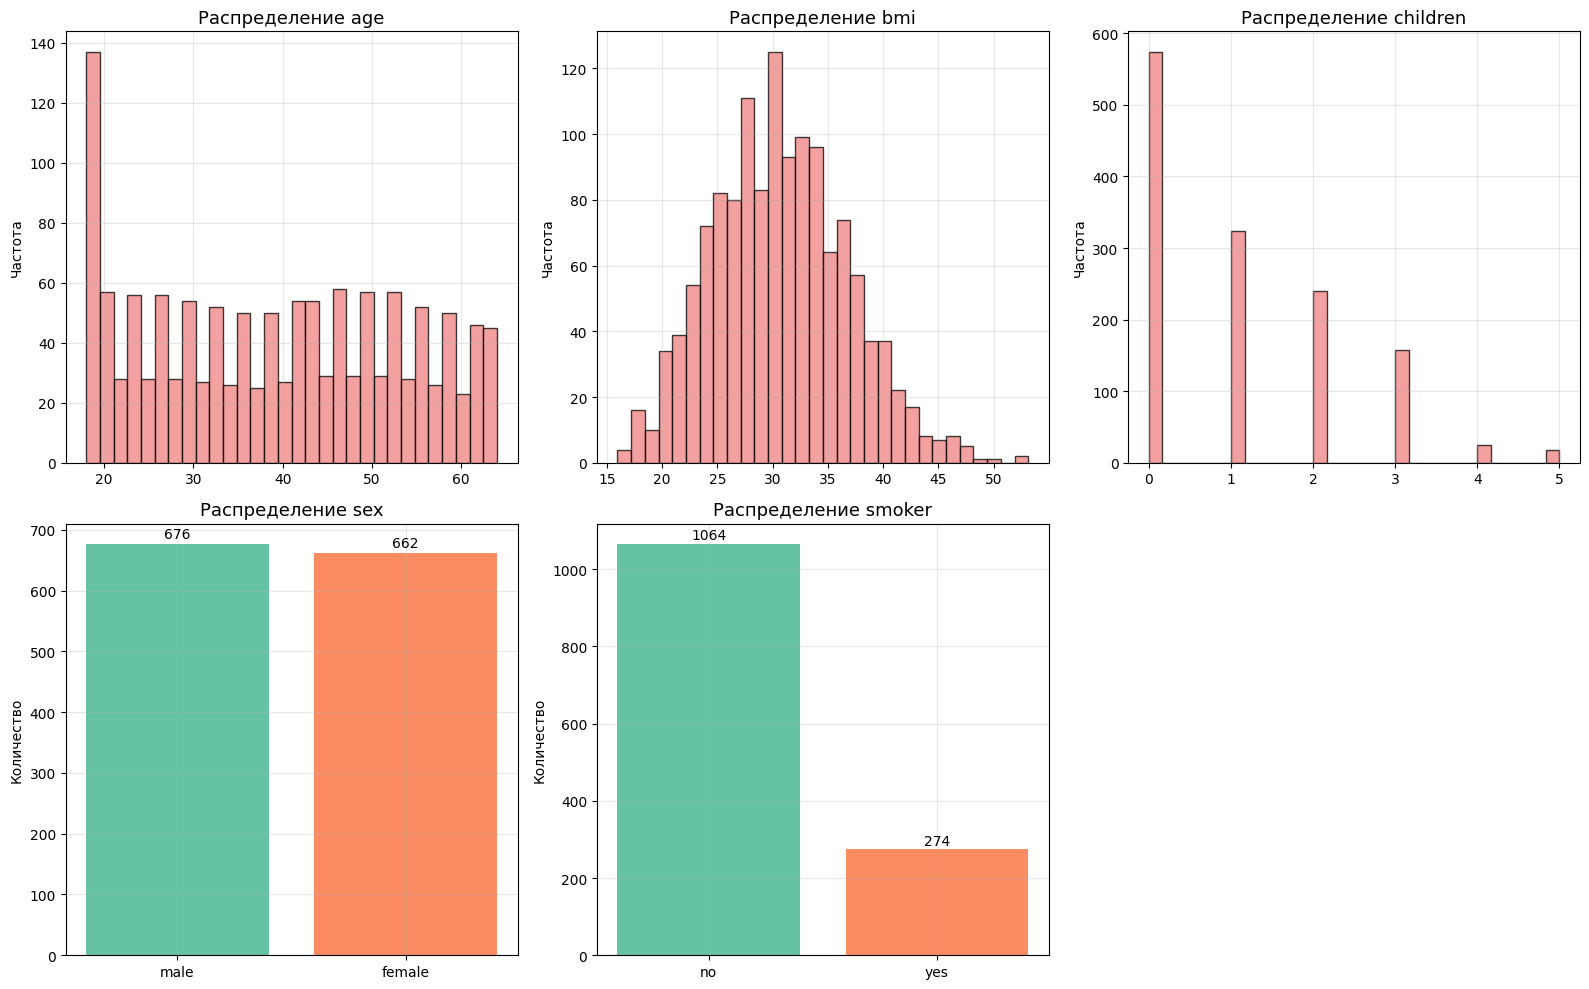

Выводы по распределениям:
  • age: равномерное, пик в 18–19 лет
  • bmi: нормальное, центр ~30 (граница ожирения)
  • children: скошено вправо, большинство 0–2 ребёнка
  • sex: почти 50/50 (мужчин чуть больше)
  • smoker: сильный дисбаланс — 80% некурящих
--------------------------------------------------


In [ ]:
print("\n=== 7. Гистограммы 5 признаков ===")
features = ['age', 'bmi', 'children', 'sex', 'smoker']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    if data[col].dtype == 'object':
        # Категориальные
        counts = data[col].value_counts()
        bars = ax.bar(counts.index, counts.values, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'][:len(counts)])
        ax.set_title(f'Распределение {col}', fontsize=13)
        ax.set_ylabel('Количество')
        # Подписи значений
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom')
    else:
        # Числовые
        ax.hist(data[col], bins=30, color='lightcoral', edgecolor='black', alpha=0.75)
        ax.set_title(f'Распределение {col}', fontsize=13)
        ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)

# Удаляем пустой subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

print("Выводы по распределениям:")
print("age: равномерное, пик в 18–19 лет")
print("bmi: нормальное, центр ~30")
print("children: скошено вправо, большинство имеют 0–2 детей")
print("sex: почти 50/50 (мужчин чуть больше)")
print("smoker: сильный дисбаланс — большинство некурящих")
print("-" * 50)


=== 8. Зависимость признаков от charges ===


/tmp/ipykernel_1883/1805376263.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(children_groups, labels=[str(i) for i in range(6)])
/tmp/ipykernel_1883/1805376263.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[3].boxplot(sex_groups, labels=['male', 'female'], patch_artist=True,


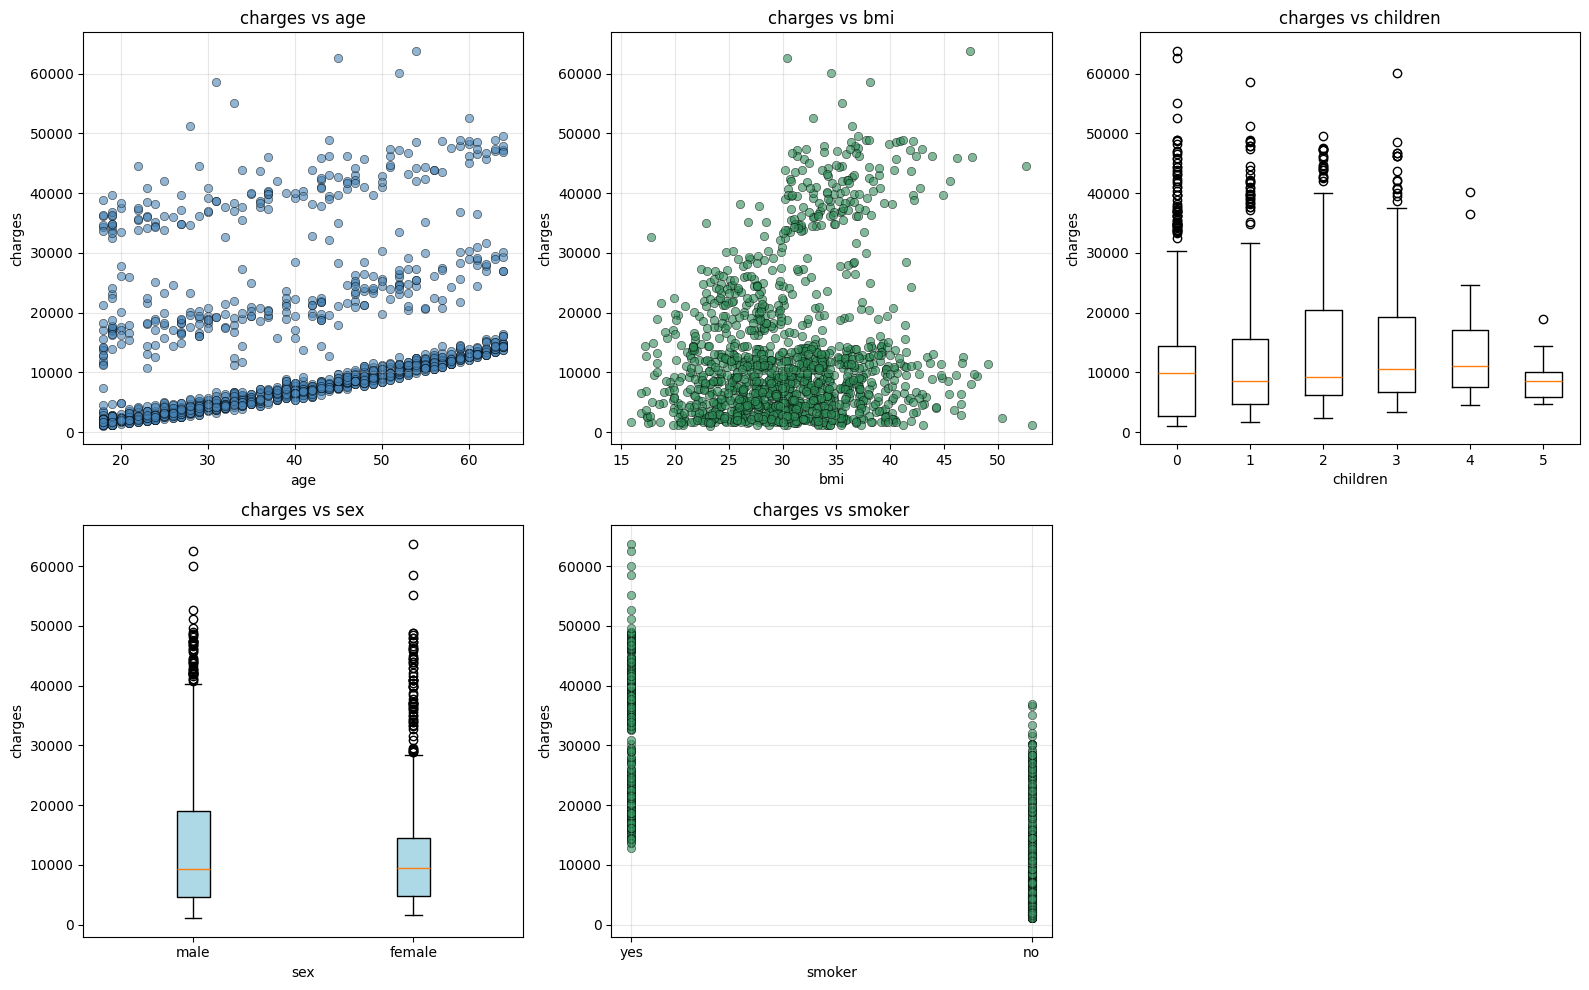

Выводы по взаимосвязям:
age: сильная положительная корреляция
bmi: слабая корреляция, но при bmi > 30 — резкий рост расходов
children: слабая зависимость, пик при 2–3 детях
sex: почти нет разницы
smoker: сильная корреляция — курильщики платят в 3–4 раза больше


In [ ]:
print("\n=== 8. Зависимость признаков от charges ===")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# 1. age
axes[0].scatter(data['age'], data['charges'], alpha=0.6, color='steelblue', edgecolor='black', linewidth=0.5)
axes[0].set_title('charges vs age')
axes[0].set_xlabel('age')
axes[0].set_ylabel('charges')
axes[0].grid(True, alpha=0.3)

# 2. bmi
axes[1].scatter(data['bmi'], data['charges'], alpha=0.6, color='seagreen', edgecolor='black', linewidth=0.5)
axes[1].set_title('charges vs bmi')
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('charges')
axes[1].grid(True, alpha=0.3)

# 3. children
children_groups = [data[data['children'] == i]['charges'] for i in range(6)]
axes[2].boxplot(children_groups, labels=[str(i) for i in range(6)])
axes[2].set_title('charges vs children')
axes[2].set_xlabel('children')
axes[2].set_ylabel('charges')

# 4. sex
sex_groups = [data[data['sex'] == 'male']['charges'], data[data['sex'] == 'female']['charges']]
axes[3].boxplot(sex_groups, labels=['male', 'female'], patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[3].set_title('charges vs sex')
axes[3].set_xlabel('sex')
axes[3].set_ylabel('charges')

# 5. smoker
smoker_groups = [data[data['smoker'] == 'no']['charges'], data[data['smoker'] == 'yes']['charges']]
axes[4].boxplot(smoker_groups, labels=['no', 'yes'], patch_artist=True,
                boxprops=dict(facecolor='salmon'))
axes[4].set_title('charges vs smoker')
axes[4].set_xlabel('smoker')
axes[4].set_ylabel('charges')

# Удаляем пустой
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

print("Выводы по взаимосвязям:")
print("age: сильная положительная корреляция")
print("bmi: слабая корреляция, но при bmi > 30 — резкий рост расходов")
print("children: слабая зависимость, пик при 2–3 детях")
print("sex: почти нет разницы")
print("smoker: сильная корреляция — курильщики платят в 3–4 раза больше")